# KSHEMA S

TCS iON  INTERNSHIP
RIO-125:HR Salary Dashboard - Train the Dataset and Predict Salary

# Problem statement
This project aims to sanitize the data, analysis and predict if an employee's salary is higher or lower than $50K/year depends on certain attributes using different ML classification algorithms.

# Importing necessary libraries and dataset to the Python environment

In [1]:
# Working with data
import numpy as np
import pandas as pd

# For Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the HR dataset 

In [3]:
ds=pd.read_csv(r"C:\Users\Anish\Downloads\salarydata.csv")

In [4]:
ds

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The dataset is shown here

In [5]:
ds.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Dataset description

Age: Age of person

Workclass: Belongs to which working class like Private/government/self employed etc

Education: Person's maximum qualification

Education-Number: Numbered qualification

Salary: Traget coloumn

    

In [6]:
# Shape of the dataset

print(ds.shape)

(32561, 14)


# DATA cleaning


In [7]:
# Checking for null values in each coloumn

In [8]:
print(ds.isna().sum())


age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


There is no null value in any of the coloumns

In [9]:
# Check the datatypes of the data

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [10]:
ds.nunique()

age                73
workclass           9
education          16
education-num      16
marital-status      7
occupation         15
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours-per-week     94
native-country     42
salary              2
dtype: int64

In [11]:
ds['age'].unique() 

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [12]:
ds['workclass'].unique() 

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [13]:
ds['workclass'] = ds['workclass'].replace('?', np.nan)

In [14]:
ds['workclass'].unique() 

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
ds.apply(lambda col: col.unique())

age               [39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 2...
workclass         [State-gov, Self-emp-not-inc, Private, Federal...
education         [Bachelors, HS-grad, 11th, Masters, 9th, Some-...
education-num     [13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6,...
marital-status    [Never-married, Married-civ-spouse, Divorced, ...
occupation        [Adm-clerical, Exec-managerial, Handlers-clean...
relationship      [Not-in-family, Husband, Wife, Own-child, Unma...
race              [White, Black, Asian-Pac-Islander, Amer-Indian...
sex                                                  [Male, Female]
capital-gain      [2174, 0, 14084, 5178, 5013, 2407, 14344, 1502...
capital-loss      [0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, ...
hours-per-week    [40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 4...
native-country    [United-States, Cuba, Jamaica, India, ?, Mexic...
salary                                                [<=50K, >50K]
dtype: object

In [16]:
for col in ds:
    print(f'{col}: {ds[col].unique()}')

age: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relations

The unique values in each coloumn have been displayed

In [17]:
ds['occupation'].unique() 

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [18]:
ds['occupation'] = ds['occupation'].replace('?', np.nan)
ds['native-country'] = ds['native-country'].replace('?', np.nan)


In [19]:
print(ds.isna().sum())


age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64


It is clear that workclass,occupation and native country contains null values

In [20]:
ds['workclass'] = ds['workclass'].fillna(ds['workclass'].mode()[0])
ds['occupation'] = ds['occupation'].fillna(ds['occupation'].mode()[0])
ds['native-country'] = ds['native-country'].fillna(ds['native-country'].mode()[0])


In [21]:
print(ds.isna().sum())

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


The null values are replaced with mode of the data

# Exploratory Data Analysis
Univariate Analysis

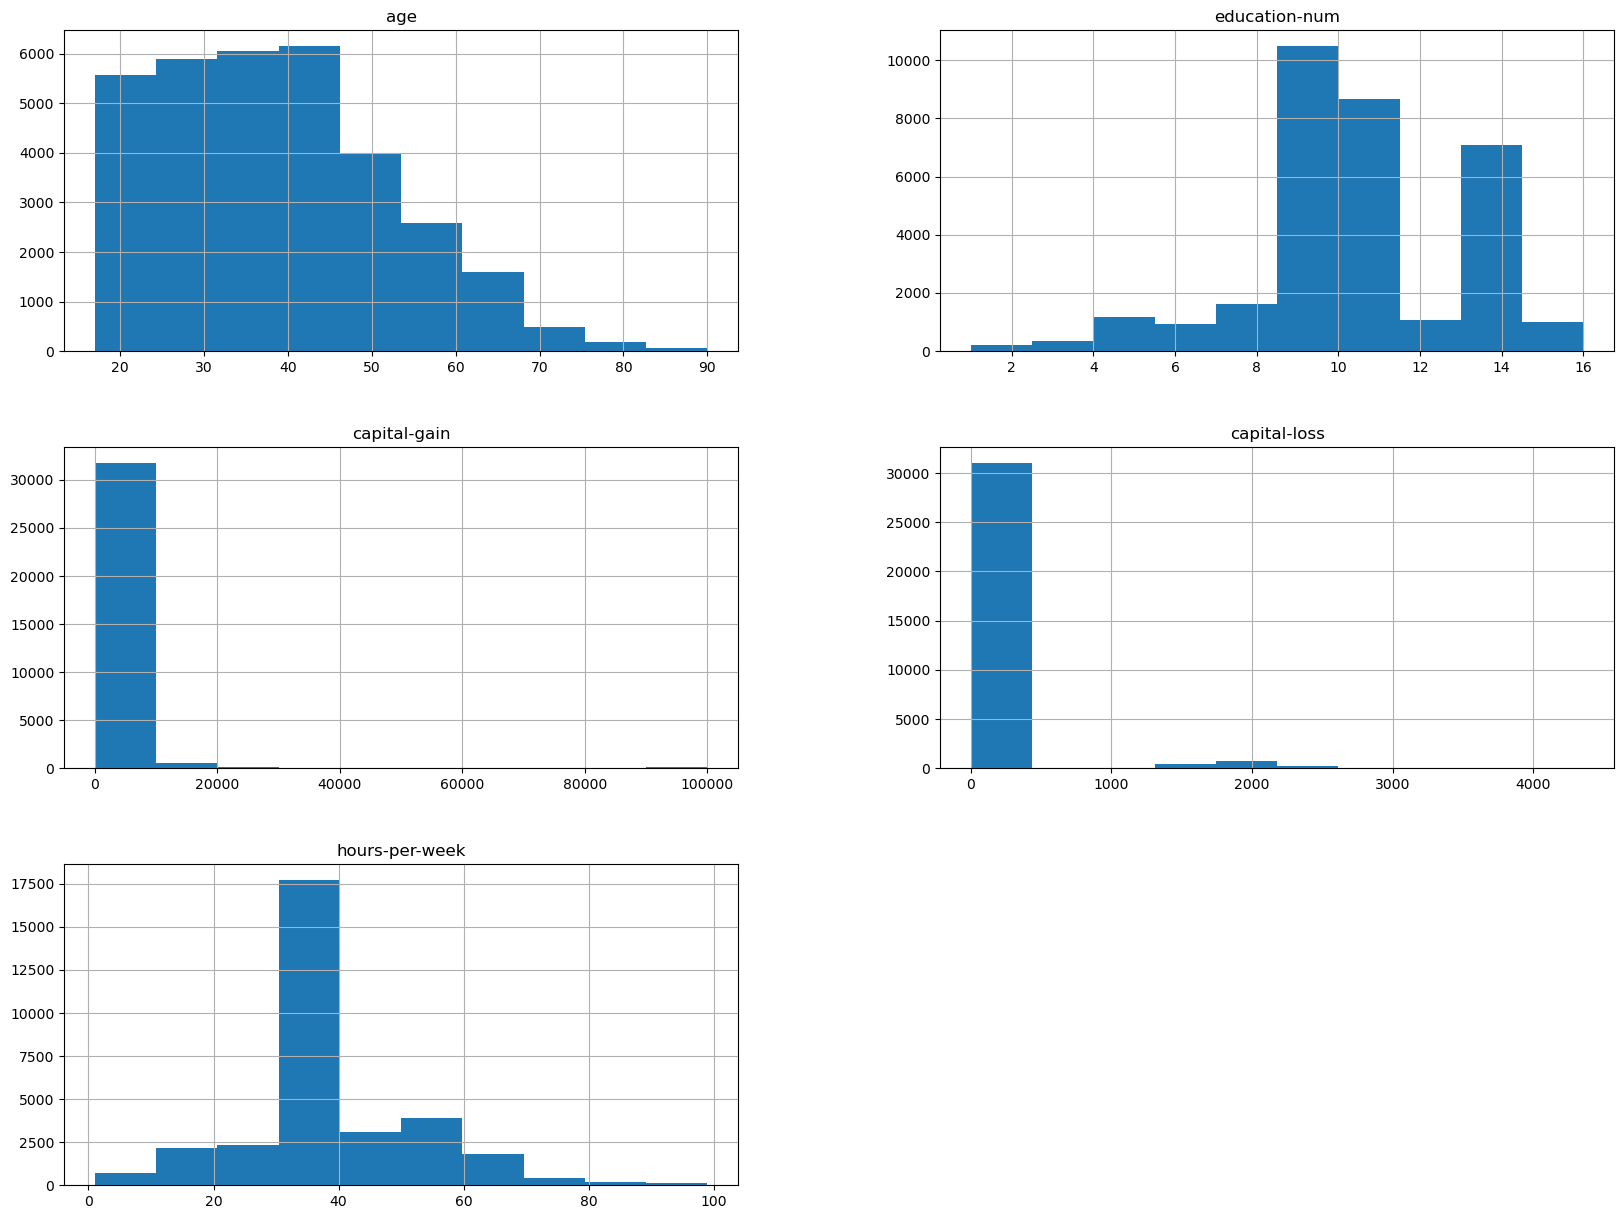

In [22]:
freqgraph = ds.select_dtypes(include = ['int'])
freqgraph.hist(figsize =(20,15))
plt.show()

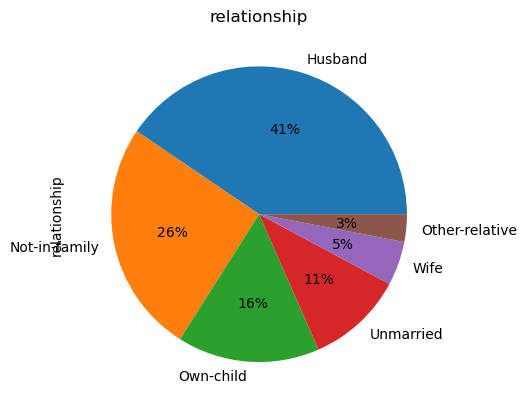

In [23]:
ds['relationship'].value_counts().plot.pie(autopct='%.0f%%')
plt.title("relationship")
plt.show()

The employees with relationship shown majority are husbands followed by not in a family and own child

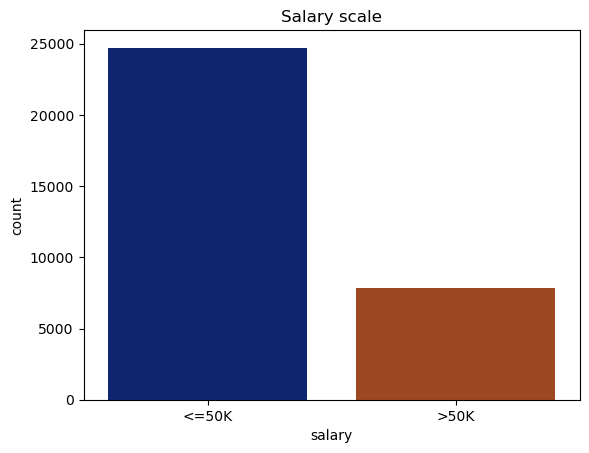

<Figure size 500x500 with 0 Axes>

In [24]:
sns.countplot(x= ds['salary'], palette="dark") 
#different types of credit accounts of a customer, shows the ability to handle multiple credits
plt.title("Salary scale")
plt.figure(figsize=(5,5))
plt.show()

People are more who getting a salary of <=50K

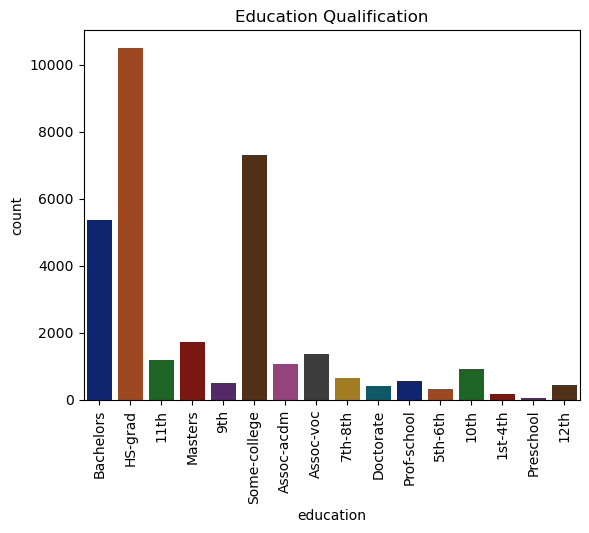

<Figure size 1000x1000 with 0 Axes>

In [25]:
sns.countplot(x= ds['education'], palette="dark") 
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
#different types of credit accounts of a customer, shows the ability to handle multiple credits
plt.title("Education Qualification")
plt.figure(figsize=(10,10))

plt.show()

More people have eductaional qualification as HS grad

# Bivariate analysis (w.r.t. target coloumn salary)

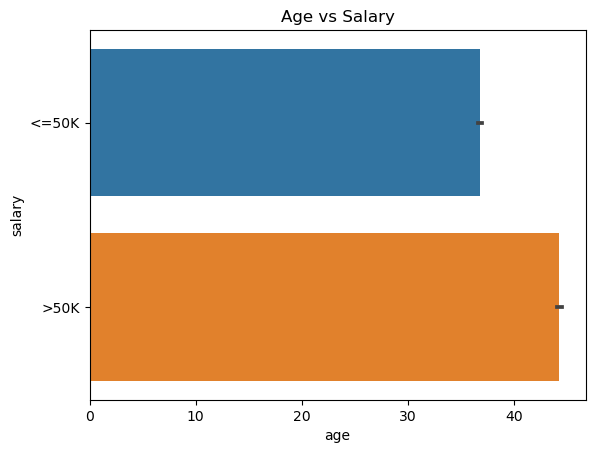

In [26]:
# Annual_Income vs credit score
sns.barplot(x=ds['age'], y=ds['salary'])
plt.title('Age vs Salary')
plt.show()

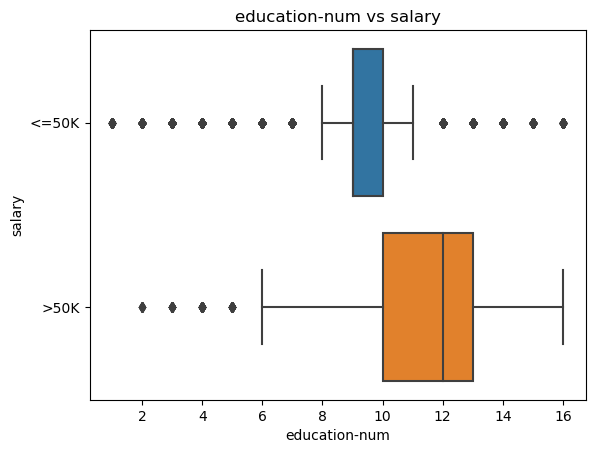

In [27]:
sns.boxplot(y=ds['salary'], x=ds['education-num'])
plt.title('education-num vs salary')
plt.show()

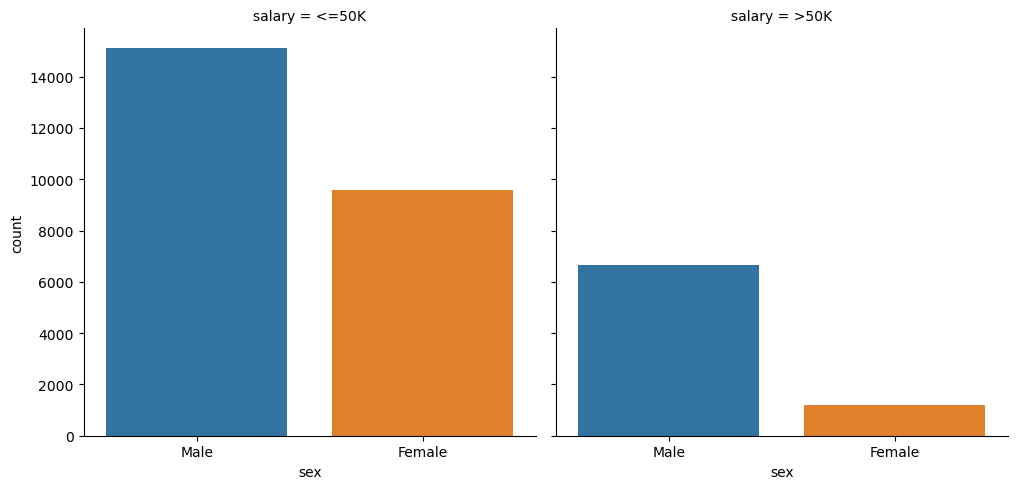

In [28]:
sns.catplot(x= 'sex', col= 'salary', data = ds, kind = 'count', col_wrap = 3)
plt.show()

# Outlier detection and removal  using boxplot 

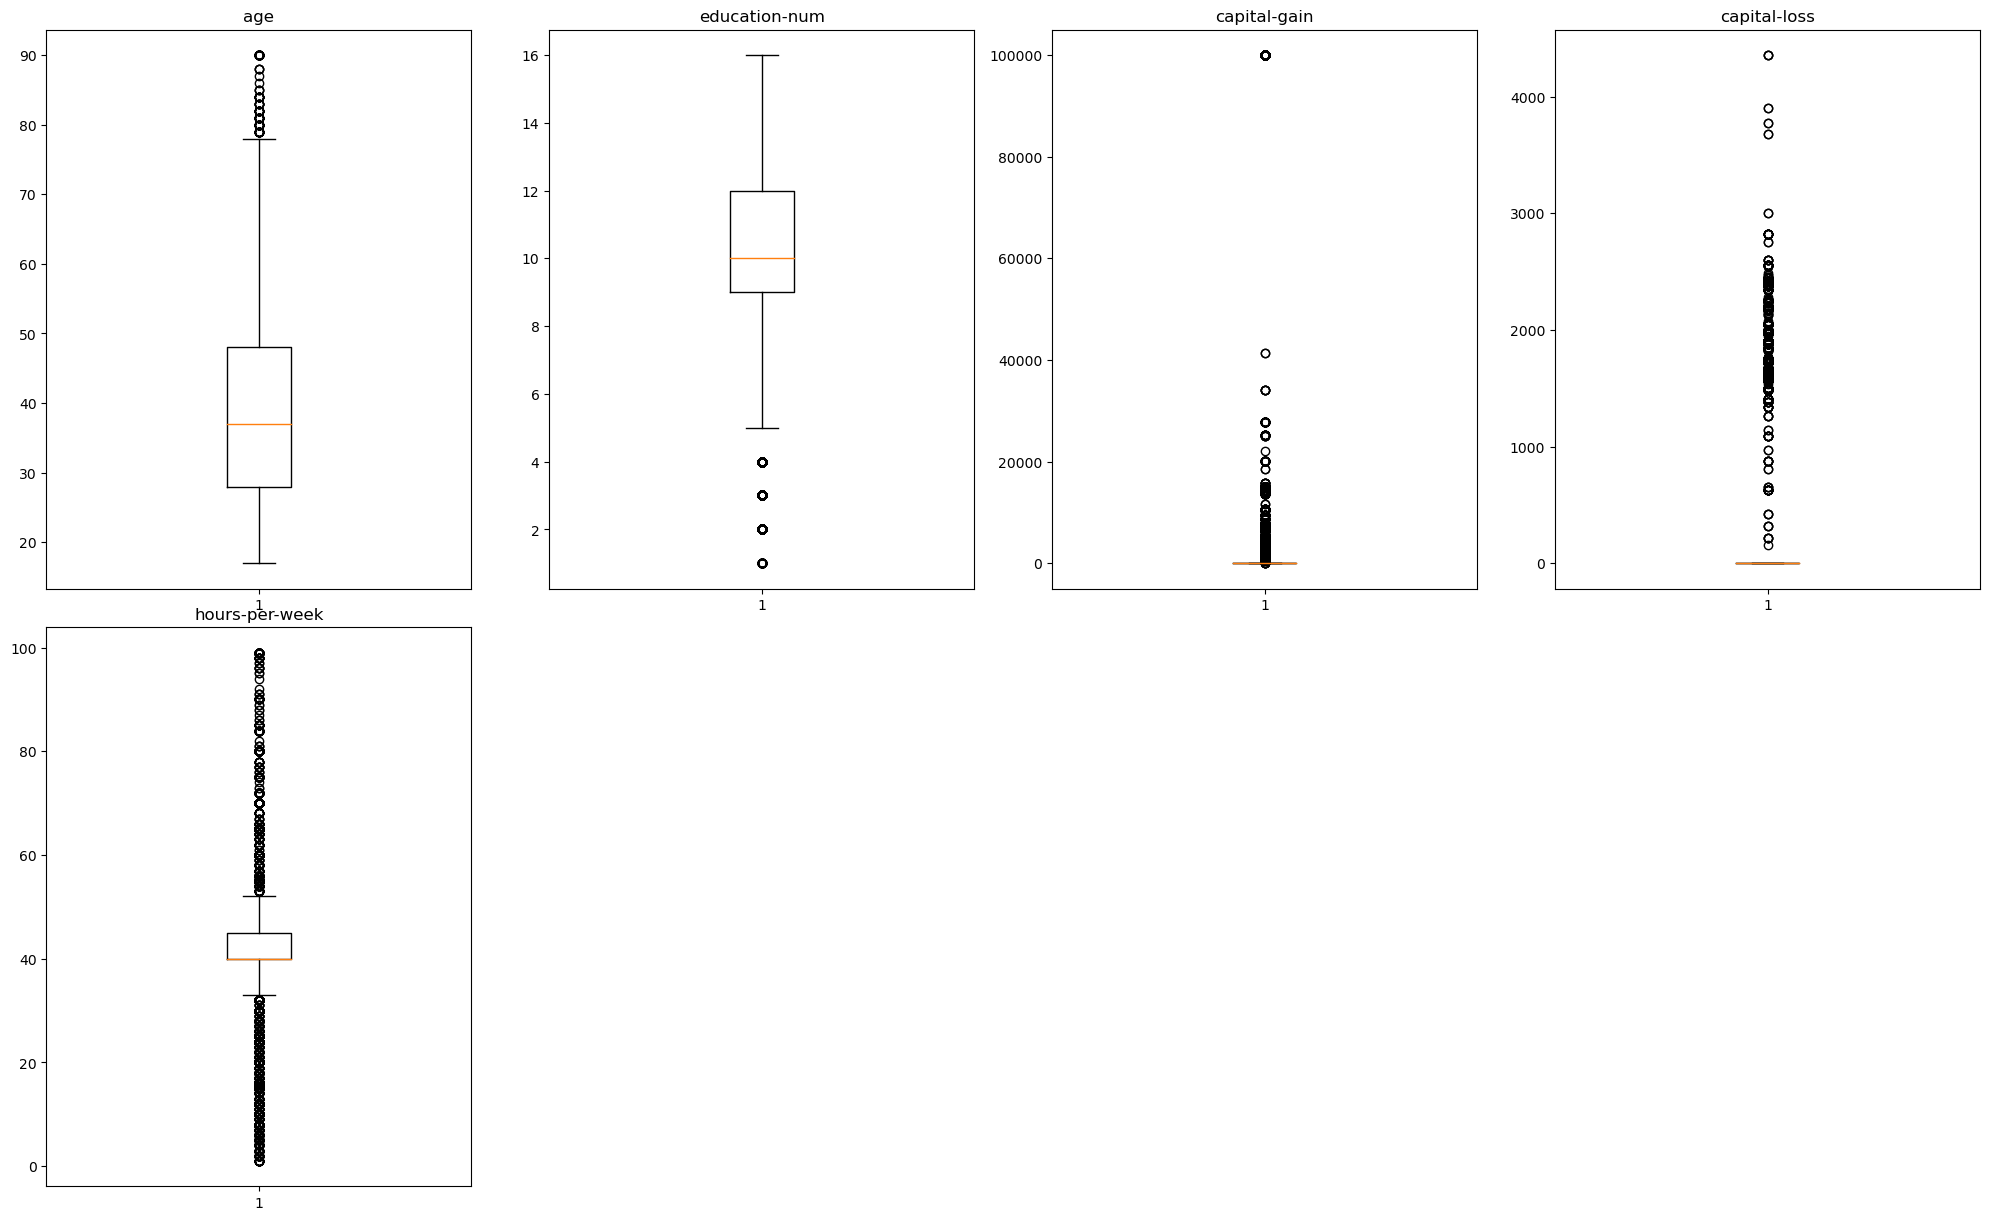

In [29]:
num_col = ds.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20,30))

for i, variable in enumerate(num_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(ds[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

In [30]:
# Identify the outliers and remove 

for i in num_col:
    Q1=ds[i].quantile(0.25) # 25th quantile
    Q3=ds[i].quantile(0.75) # 75th quantile
    IQR = Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    ds[i] = np.clip(ds[i], Lower_Whisker, Upper_Whisker)

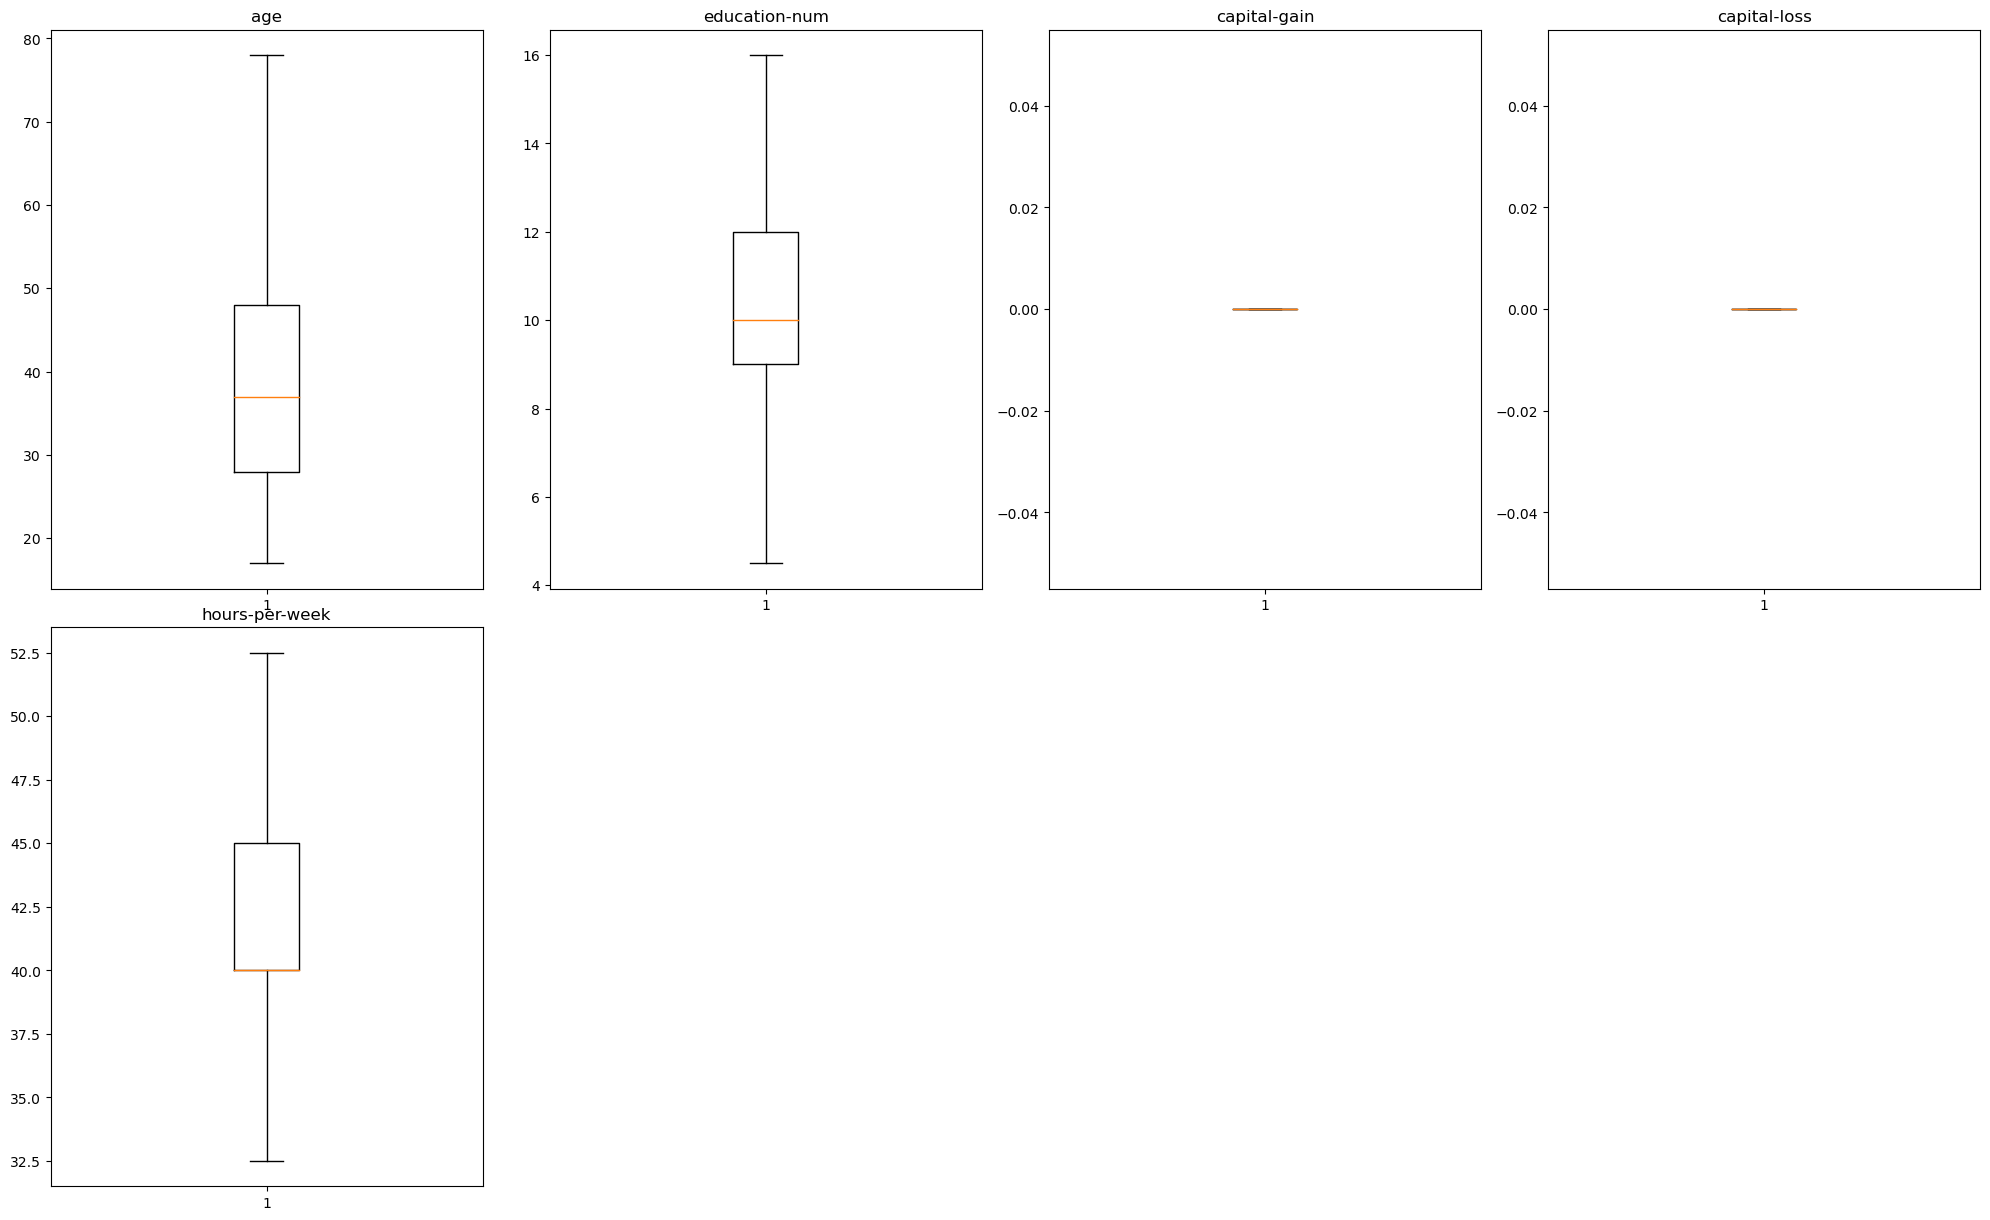

In [31]:
# PLot the numerical columns
plt.figure(figsize=(20,30))
for i, variable in enumerate(num_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(ds[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

In [32]:
ds[['age','salary']].head(24)

,age,salary
0,39.0,<=50K
1,50.0,<=50K
2,38.0,<=50K
3,53.0,<=50K
4,28.0,<=50K
5,37.0,<=50K
6,49.0,<=50K
7,52.0,>50K
8,31.0,>50K
9,42.0,>50K


# Label Encoding

In [33]:
from sklearn import preprocessing 
label= preprocessing.LabelEncoder()  
ds['workclass']=label.fit_transform(ds['workclass'])
ds['education']=label.fit_transform(ds['education'])
ds['occupation']=label.fit_transform(ds['occupation'])
ds['sex']=label.fit_transform(ds['sex'])
ds['salary']=label.fit_transform(ds['salary'])
ds['race']=label.fit_transform(ds['race'])
ds['native-country']=label.fit_transform(ds['native-country'])
ds['marital-status']=label.fit_transform(ds['marital-status'])
ds['relationship']=label.fit_transform(ds['relationship'])

In [34]:
ds

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,6,9,13.0,4,0,1,4,1,0.0,0.0,40.0,38,0
1,50.0,5,9,13.0,2,3,0,4,1,0.0,0.0,32.5,38,0
2,38.0,3,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0
3,53.0,3,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0
4,28.0,3,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,3,7,12.0,2,12,5,4,0,0.0,0.0,38.0,38,0
32557,40.0,3,11,9.0,2,6,0,4,1,0.0,0.0,40.0,38,1
32558,58.0,3,11,9.0,6,0,4,4,0,0.0,0.0,40.0,38,0
32559,22.0,3,11,9.0,4,0,3,4,1,0.0,0.0,32.5,38,0


In [35]:
for i in ['workclass', 'education','marital-status','occupation','salary']:  
    ds[i]=label.fit_transform(ds[i])
    le_name_mapping =dict((zip(label.classes_, label.transform(label.classes_))))
    print(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
{0: 0, 1: 1}


# Standardization

In [36]:
scale_col = ['age',  'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week']

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

ds[scale_col]= std.fit_transform(ds[scale_col])

In [37]:
ds

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.032782,6,9,1.169103,4,0,1,4,1,0.0,0.0,-0.194354,38,0
1,0.844236,5,9,1.169103,2,3,0,4,1,0.0,0.0,-1.406591,38,0
2,-0.040986,3,11,-0.457091,0,5,1,4,1,0.0,0.0,-0.194354,38,0
3,1.065541,3,1,-1.270187,2,5,0,2,1,0.0,0.0,-0.194354,38,0
4,-0.778671,3,9,1.169103,2,9,5,2,0,0.0,0.0,-0.194354,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.852440,3,7,0.762554,2,12,5,4,0,0.0,0.0,-0.517617,38,0
32557,0.106551,3,11,-0.457091,2,6,0,4,1,0.0,0.0,-0.194354,38,1
32558,1.434384,3,11,-0.457091,6,0,4,4,0,0.0,0.0,-0.194354,38,0
32559,-1.221282,3,11,-0.457091,4,0,3,4,1,0.0,0.0,-1.406591,38,0


In [38]:
ds.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,3.256100e+04,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.0,32561.0,3.256100e+04,32561.000000,32561.000000
mean,2.082286e-17,3.094438,10.298210,-2.420116e-16,2.611836,6.138755,1.446362,3.665858,0.669205,0.0,0.0,-9.023712e-16,36.417155,0.240810
std,1.000015e+00,1.107194,3.870264,1.000015e+00,1.506222,3.972708,1.606771,0.848806,0.470506,0.0,0.0,1.000015e+00,6.056047,0.427581
min,-1.590124e+00,0.000000,0.000000,-2.286558e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-1.406591e+00,0.000000,0.000000
25%,-7.786710e-01,3.000000,9.000000,-4.570906e-01,2.000000,3.000000,0.000000,4.000000,0.000000,0.0,0.0,-1.943540e-01,38.000000,0.000000
50%,-1.147545e-01,3.000000,11.000000,-5.054229e-02,2.000000,6.000000,1.000000,4.000000,1.000000,0.0,0.0,-1.943540e-01,38.000000,0.000000
75%,6.966990e-01,3.000000,12.000000,7.625543e-01,4.000000,9.000000,3.000000,4.000000,1.000000,0.0,0.0,6.138038e-01,38.000000,0.000000
max,2.909754e+00,7.000000,15.000000,2.388748e+00,6.000000,13.000000,5.000000,4.000000,1.000000,0.0,0.0,1.826041e+00,40.000000,1.000000


# Split dataset into test and train

In [39]:

from sklearn.model_selection import train_test_split

In [40]:
X = ds.drop('salary', axis=1)
y= ds['salary']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.25, random_state=42, stratify=y)

In [42]:
ds['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [43]:
ds['marital-status'].value_counts()


2    14976
4    10683
0     4443
5     1025
6      993
3      418
1       23
Name: marital-status, dtype: int64

# Modelling


In [44]:
# split data into test and train
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.25, random_state=42, stratify=y)

# 1) Logistic Regression
In logistic regression, the model predicts the probability that an instance belongs to a particular class. This probability is represented by a value between 0 and 1, where 0 indicates that the instance definitely does not belong to the class and 1 indicates that it definitely does.To make these predictions, logistic regression uses a logistic function, which takes in a linear combination of the input features and maps it to a value between 0 and 1.

In [46]:

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report

In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=2000)
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
con_lr=confusion_matrix(y_test,pred_lr)
print("The confusion matrix of logistic regression is \n",con_lr)
ac_lr=accuracy_score(y_test,pred_lr)
print('Accuracy:',ac_lr*100)

The confusion matrix of logistic regression is 
 [[5755  426]
 [1163  797]]
Accuracy: 80.48151332760102


In [48]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      6181
           1       0.65      0.41      0.50      1960

    accuracy                           0.80      8141
   macro avg       0.74      0.67      0.69      8141
weighted avg       0.79      0.80      0.79      8141



*Precision is the fraction of predicted positive instances that are actually positive, and is calculated as TP / (TP + FP). It gives you an idea of the proportion of positive predictions that are correct. High precision means that the model is good at not labeling negative instances as positive.

*Recall is the fraction of actual positive instances that were predicted to be positive, and is calculated as TP / (TP + FN). It gives you an idea of the proportion of positive instances that the model was able to identify. High recall means that the model is good at finding all the positive instances.

*The F1 score is the harmonic mean of precision and recall, and is calculated as 2 * (precision * recall) / (precision + recall). It is a balanced metric that takes into account both precision and recall.
Support is the number of instances in each class.

*Accuracy is the fraction of correct predictions made by the model, and is calculated as (TP + TN) / (TP + TN + FP + FN). It gives you an idea of the overall accuracy of the model.

In [49]:
pred_lr[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# 2) K Nearest Negihbour Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(70,90)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train)
    pred_knn=knn.predict(X_test)
    acc=accuracy_score(y_test, pred_knn)
    acc_values.append(acc)
    
     


Text(0, 0.5, 'accuracy')

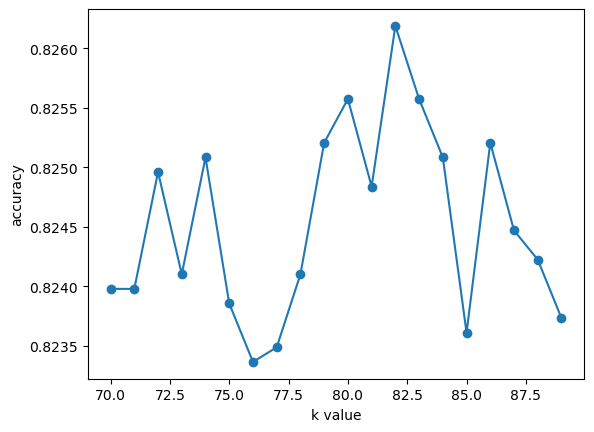

In [51]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
     


In [52]:

print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6181
           1       0.67      0.53      0.59      1960

    accuracy                           0.82      8141
   macro avg       0.76      0.72      0.74      8141
weighted avg       0.81      0.82      0.82      8141



In [53]:
pred_knn[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [54]:
con_lr=confusion_matrix(y_test,pred_knn)
print("The confusion matrix of knn is \n",con_lr)
ac_knn=accuracy_score(y_test,pred_knn)
print('Accuracy:',ac_knn*100)

The confusion matrix of knn is 
 [[5666  515]
 [ 920 1040]]
Accuracy: 82.3731728288908


# 3)Decision Tree classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()
dtr.fit(X_train,y_train)
dtr.fit(X_train,y_train)
pred_dt=dtr.predict(X_test)
con_dtr=confusion_matrix(y_test,pred_dt)
print("The confusion matrix of decision tree is \n",con_dtr)
ac_dt=accuracy_score(y_test,pred_dt)
print('Accuracy:',ac_dt*100)

The confusion matrix of decision tree is 
 [[5336  845]
 [ 924 1036]]
Accuracy: 78.27048274167792


In [56]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      6181
           1       0.55      0.53      0.54      1960

    accuracy                           0.78      8141
   macro avg       0.70      0.70      0.70      8141
weighted avg       0.78      0.78      0.78      8141

